# Polynomial Regression

Polynomial linear regression memiliki 1 kolom/input saja, namun input ini diduplikasi disertai dengan penambahan pangkat, sehingga persamaan yang didapatkan dari polynomial linear regression adalah
$y=b_0+b_1.x_1+b_2.x_1^2+...+b_n.x_1^n$
sedangkan untuk multiple linear regression 
$y=b_0+b_1.x_1+b_2.x_2+...+b_n.x_n$
dari persamaan diatas dapat disimpulkan polynomial linear regression adalah kasus khusus multiple linear regression, hanya saja predictornya diganti menjadi 1 variabel input disertai pangkat yang sesuai, sehingga kita dapat menggunakan metode penyelesaian multiple linear regression pada polynomial linear regression.

Note: mengapa masih dinamakan linear ?
karena linear bukan merujuk pada variabel input-nya, melainkan pada koefisien yang bersamanya, seluruh koefisien masih mendampinginya dengan pengalian. jika seperti ini $y=b_0+b_1.{x_1/x_2}$ maka bukan linear

## Importing the libraries

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [5]:
dataset = pd.read_csv('Position_Salaries.csv')
#akan menjadi 1D jika X seperti ini
X = dataset.iloc[:, 1].values
y = dataset.iloc[:, -1].values
#transpose
X=X.reshape(len(X),1)

Disini kita tidak perlu memisahkan antara data test dan training, karena tiap data merepresentasikan jabatan tertentu (ordinal encoding dari jabatan) dan data kita hanya sedikit.

## Training the Linear Regression model on the whole dataset

In [6]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X,y)

LinearRegression()

## Training the Polynomial Regression model on the whole dataset

In [7]:
from sklearn.preprocessing import PolynomialFeatures
pf = PolynomialFeatures(degree=2)
X_poly = pf.fit_transform(X)
lr_poly = LinearRegression()
lr_poly.fit(X_poly,y)

LinearRegression()

## Visualising the Linear Regression results

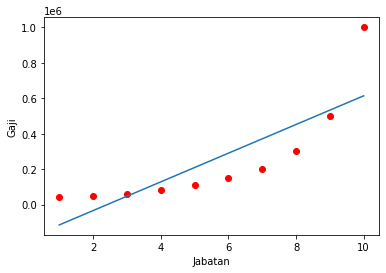

In [8]:
plt.scatter(X,y,color="red")
plt.plot(X,lr.predict(X))
plt.xlabel("Jabatan")
plt.ylabel("Gaji")
plt.show()

## Visualising the Polynomial Regression results

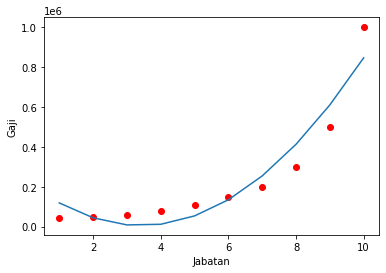

In [9]:
plt.scatter(X,y,color="red")
plt.plot(X,lr_poly.predict(X_poly))
plt.xlabel("Jabatan")
plt.ylabel("Gaji")
plt.show()

## Visualising the Polynomial Regression results (for higher resolution and smoother curve)

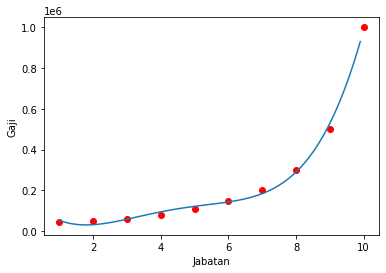

In [10]:
#memperbanyak x agar grafik smooth
dummy_X_smoother_graph = np.array([[i for i in np.arange(1,10,0.1)]])
#transpose agar menjadi 2D
X_smoother_graph = dummy_X_smoother_graph.reshape(len(dummy_X_smoother_graph[0]),1)
#derajat 4 polynomial linear regression
pf_smoother = PolynomialFeatures(degree=4)
X_smoother_graph_poly = pf_smoother.fit_transform(X_smoother_graph)
X_smoother_poly = pf_smoother.fit_transform(X)
lr_poly_smoother = LinearRegression()
lr_poly_smoother.fit(X_smoother_poly,y)
plt.scatter(X,y,color="red")
plt.plot(X_smoother_graph,lr_poly_smoother.predict(X_smoother_graph_poly))
plt.xlabel("Jabatan")
plt.ylabel("Gaji")
plt.show()

Mencoba maksimum derajat yang lebih besar, sehingga dapat memprediksi lebih akurat dan memperbanyak X untuk grafik yang lebih baik

## Predicting a new result with Linear Regression

[[ 1.20000000e+00 -9.82787879e+04]
 [ 2.60000000e+00  1.49515152e+04]
 [ 3.30000000e+00  7.15666667e+04]
 [ 4.80000000e+00  1.92884848e+05]
 [ 5.70000000e+00  2.65675758e+05]
 [ 9.90000000e+00  6.05366667e+05]]


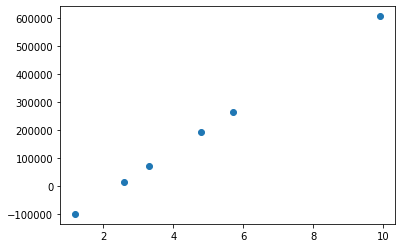

In [11]:
X_pred = np.array([[1.2,2.6,3.3,4.8,5.7,9.9]]).reshape(6,1)
y_pred = lr.predict(X_pred)
plt.scatter(X_pred,y_pred)
print(np.concatenate((X_pred,y_pred.reshape(len(y_pred),1)),1))

## Predicting a new result with Polynomial Regression

[[1.20000000e+00 1.00703030e+05]
 [2.60000000e+00 1.80606061e+04]
 [3.30000000e+00 5.30416667e+03]
 [4.80000000e+00 4.20939394e+04]
 [5.70000000e+00 1.06140530e+05]
 [9.90000000e+00 8.21254167e+05]]


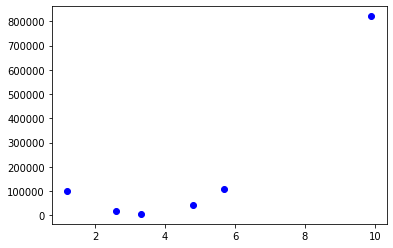

In [12]:
X_pred_poly = pf.fit_transform(X_pred)
y_pred_poly = lr_poly.predict(X_pred_poly)
plt.scatter(X_pred,y_pred_poly,color="blue")
print(np.concatenate((X_pred,y_pred_poly.reshape(len(y_pred_poly),1)),1))

## Predicting new result with smoother Polynomial Regression

[[1.20000000e+00 4.25513660e+04]
 [2.60000000e+00 4.50700606e+04]
 [3.30000000e+00 6.97154503e+04]
 [4.80000000e+00 1.17164932e+05]
 [5.70000000e+00 1.36334192e+05]
 [9.90000000e+00 9.29952950e+05]]


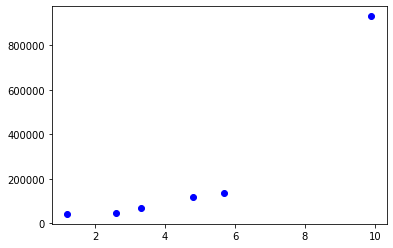

In [13]:
X_pred_smoother_poly = pf_smoother.fit_transform(X_pred)
y_pred_poly_smoother = lr_poly_smoother.predict(X_pred_smoother_poly)
plt.scatter(X_pred,y_pred_poly_smoother,color="blue")
print(np.concatenate((X_pred,y_pred_poly_smoother.reshape(len(y_pred_poly_smoother),1)),1))